<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>
<h2 align='center'> Diego Gutierrez 201573558-1 </h2>
<h2 align='center'> Maria Apolo 201573509-3 </h2>
<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>


<a id="segundo"></a>
## 2. Detección de acoso en *Twitter*
---
En las redes sociales muchas veces se encuentra con un cierto comportamiento indeseable para los usuarios, tal como racismo, misógeno, grupos de odio o *trolls*. El poder detectar de manera automática ciertos patrones en el comportamiento para tomar una acción debe ser crucial para reducir el tiempo y esfuerzo humano. En esta actividad se trabajará sobre *tweets* la red social de *twitter* para detectar comportamiento *online* de acoso (*harassment*), que por lo general, incluye *flaming* como lenguaje abusivo o insultos, *doxing* como mostrar la información personal de una mujer, por ejemplo el domicilio o número de teléfono, la suplantación o la vergüenza pública por destruir la reputación de las personas.

<img src="https://kidshelpline.com.au/sites/default/files/bdl_image/header-T-OH.png" title="Title text" width="45%"  />

En algunos problemas como este, el comportamiento a detectar puede ser asociado a una anomalía (*outlier*) del comportamiento normal de los usuarios en las redes sociales. Esto es una de las causas de la dificultad del problema, puesto que es **altamente desbalanceado**, donde aproximadamente un 10% de los *tweets* corresponden a acoso (*harassment*).

Los datos trabajados corresponderan a *tweets* etiquetados como *harassment* (con valor 1) o no (con valor 0) -- la tarea a detectar--. Además si desea utilizar, se incluye la información del tipo de *harassment* en el conjunto de entrenamiento como atributos extras. El conjunto de pruebas solo contiene los *tweets* a ser etiquetados.

---
### Importante
* Esta pregunta será evaluada **sólo** por los resultados (*submission*) obtenidos en el desafío presentado en __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/91f8c0c746f945cfa510b88469df4d67)__. Las notas serán entregadas a través de la siguiente fórmula:  
$$ Nota(i) = 100\cdot max\left(0.55; s^{(1-i)} \right), \ \ con \ \ i \in \{1,\ \ldots, N\}$$
Con la escala de decaimiento es $ s = 1.05$ y con $i$ su lugar en el *ranking*.

* La métrica de evaluación será el *f1 score* [[3]](#refs) sobre la clase positiva (*harassment*), así evaluar la calidad del modelo sobre la clase minoritaria, lo cual también debiera reflejar el desempeño de la clase negativa (al ser el complemento).
```python
from  sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')
```

* El archivo de *submission* debe contener las predicciones de *harassment* (0 o 1) a cada dato de pruebas, además de la columna de *id* asociado al dato, iniciando en 1. Si leyó de manera ordenada el archivo de pruebas, se puede generar de la siguiente manera:
```python
df_aux = pd.DataFrame()
df_aux["id"] = np.arange(1, 1+y_pred.shape[0])
df_aux["harassment"] = y_pred.astype('int')
df_aux.to_csv("test_estimation.csv", index=False)
```

* Se solicita realizar **un solo** *submission* por grupo, para no perjudicar la nota de sus compañeros en el *ranking*. Además de ser claros con sus nombres de entrega para no asignarles de manera errónea su correspondiente nota.

* **Si no realiza *submission* a Kaggle su nota en esta sección será de 0**.

* **Si su *score* alcanzado es menor o igual al *benchmark* random que se encuentra en el *ranking*, su nota en esta sección será de 25**

In [25]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import BaggingClassifier
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC as SVM #SVC is for classification
from sklearn.metrics import accuracy_score

In [26]:
df = pd.read_csv("Train_data.csv")
df_test = pd.read_csv("Test_input.csv")

df.head()

,id,tweet_content,harassment,IndirectH,PhysicalH,SexualH
0,9565,also released this video of photos voyager too...,0,0,0,0
1,6794,Yeah sexting older games until x89 teach doug...,0,0,0,0
2,4337,ava There s likely hundreds of stories like t...,0,0,0,0
3,6621,Wonder if there is significance to having Ava ...,0,0,0,0
4,3289,i m a slut for guacamole an avocadhoe if you will,0,0,0,0


In [27]:
cant_har = len(df[df.harassment == 1])
cant_no_har = len(df[df.harassment == 0])
perc_har = (cant_har/(cant_har + cant_no_har))*100
print("El porcentaje de tweets que corresponden a harassment es de: ", perc_har)

El porcentaje de tweets que corresponden a harassment es de:  9.62651236191478


Se puede observar que se cuenta con un dataframe desbalanceado, ya que se poseen menos tweets que corresponden a harassment que tweets que sí. Esto podría conllevar problemas posteriores en el entrenamiento, dado que se tiene menos cantidad de datos con harassment para aprender de ellos. 

In [28]:

X = df.tweet_content 
Y = df.harassment

X_train, X_val, Y_train, Y_val = train_test_split(X, Y,test_size= 0.3, random_state=0)
train_tweets = [tweets for tweets in X_train]
val_tweets = [tweets for tweets in X_val]



In [29]:


vectorizer1 = CountVectorizer(ngram_range=(1, 1), binary=False)
vectorizer1.fit(train_tweets)
features_train = vectorizer1.transform(train_tweets)
features_val = vectorizer1.transform(val_tweets)

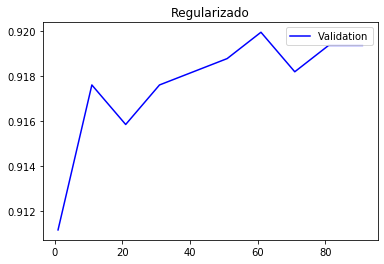

El numero de estimadores con mejor resultado para Bagging Regularizado es [61]
El accuracy maximo usando Bagging Regularizado es de 0.9199298655756867


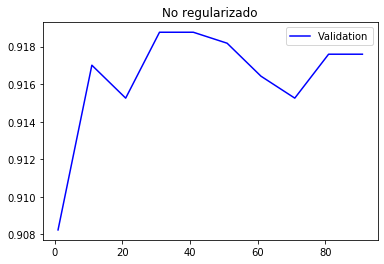

El numero de estimadores con mejor resultado para Bagging No Regularizado es [31 41]
El accuracy maximo usando Bagging No regularizado es de 0.9187609585037989


In [30]:

n_estim = np.arange(start=1, stop=100, step=10)
arr_val = []
arr_val2 = []
for i in n_estim:
    #MODELO REGULARIZADO
    model_r = BaggingClassifier(base_estimator = Tree(max_depth=13,min_samples_split=2,min_samples_leaf=1), n_estimators = i, n_jobs = -1, random_state = 0)
    model_r.fit(features_train,Y_train)
    y_val_hat = model_r.predict(features_val)
    acc_val=accuracy_score(Y_val,y_val_hat)
    arr_val.append(acc_val)
    #MODELO NO REGULARIZADO
    model_unr = BaggingClassifier(base_estimator = Tree(), n_estimators = i, n_jobs = -1, random_state = 0)
    model_unr.fit(features_train,Y_train)
    y_val2_hat = model_unr.predict(features_val)
    acc_val2=accuracy_score(Y_val,y_val2_hat)
    arr_val2.append(acc_val2)

plt.plot(n_estim,arr_val, c= 'b', label='Validation')
plt.legend()
plt.title("Regularizado")
plt.show()
result = np.where(arr_val == np.amax(arr_val))
print("El numero de estimadores con mejor resultado para Bagging Regularizado es",result[0]*10+1)
print("El accuracy maximo usando Bagging Regularizado es de",max(arr_val))

plt.plot(n_estim,arr_val2, c= 'b', label='Validation')
plt.legend()
plt.title("No regularizado")
plt.show()
result2 = np.where(arr_val2 == np.amax(arr_val2))
print("El numero de estimadores con mejor resultado para Bagging No Regularizado es",result2[0]*10+1)
print("El accuracy maximo usando Bagging No regularizado es de",max(arr_val2))

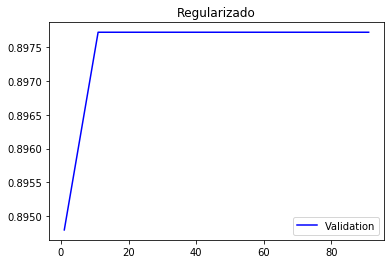

El numero de estimadores con mejor resultado para RandomForest Regularizado es [11 21 31 41 51 61 71 81 91]
El accuracy maximo usando RandomForest Regularizado es de 0.8977206312098188


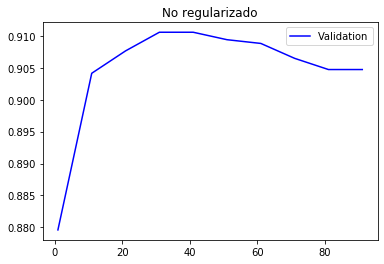

El numero de estimadores con mejor resultado para RandomForest No Regularizado es [31 41]
El accuracy maximo usando RandomForest No regularizado es de 0.9105786090005844


In [31]:
n_estim = np.arange(start=1, stop=100, step=10)
arr_val = []
arr_val2 = []
for i in n_estim:
    model_r = RandomForestClassifier(n_estimators = i, n_jobs = -1,max_depth=13,random_state = 0)
    model_r.fit(features_train,Y_train)
    y_val_hat = model_r.predict(features_val)
    acc_val=accuracy_score(Y_val,y_val_hat)
    arr_val.append(acc_val)
    #print(acc_val)
    model_unr = RandomForestClassifier(n_estimators = i, n_jobs = -1, random_state = 0)
    model_unr.fit(features_train,Y_train)
    y_val2_hat = model_unr.predict(features_val)
    acc_val2=accuracy_score(Y_val,y_val2_hat)
    #print(acc_val2)
    arr_val2.append(acc_val2)

import matplotlib.pyplot as plt
plt.plot(n_estim,arr_val, c= 'b', label='Validation')
plt.legend()
plt.title("Regularizado")
plt.show()
result = np.where(arr_val == np.amax(arr_val))
print("El numero de estimadores con mejor resultado para RandomForest Regularizado es",result[0]*10+1)
print("El accuracy maximo usando RandomForest Regularizado es de",max(arr_val))

plt.plot(n_estim,arr_val2, c= 'b', label='Validation')
plt.legend()
plt.title("No regularizado")
plt.show()
result2 = np.where(arr_val2 == np.amax(arr_val2))
print("El numero de estimadores con mejor resultado para RandomForest No Regularizado es",result2[0]*10+1)
print("El accuracy maximo usando RandomForest No regularizado es de",max(arr_val2))

In [32]:
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
SVM_accu=[]
for i in Cs:
    model= SVM()
    model.set_params(C=i,kernel='rbf') #try rbf and linear at least
    model.fit(features_train,Y_train)
    Y_val_hat = model.predict(features_val)
    accu = accuracy_score(Y_val,Y_val_hat)
    SVM_accu.append(accu)
print(SVM_accu)

[0.8977206312098188, 0.8977206312098188, 0.8977206312098188, 0.8977206312098188, 0.9088252483927528, 0.9129164231443601, 0.9129164231443601, 0.9129164231443601]


Al usar SVM para clasificación con parametros de C = 10 y kernel RBF se obtiene la mejor acuraccy de este modelo, con un valor de 0,913 aproximadamente.

In [33]:
X_test = df_test.tweet_content
X = df.tweet_content 
Y = df.harassment
test_tweets = [tweets for tweets in X_test]
train_tweets = [tweets for tweets in X]
vectorizer1 = CountVectorizer(ngram_range=(1, 1), binary=False)
vectorizer1.fit(train_tweets)
features_train = vectorizer1.transform(train_tweets)
features_test = vectorizer1.transform(test_tweets)

model_r = BaggingClassifier(base_estimator = Tree(max_depth=13,min_samples_split=2,min_samples_leaf=1), n_estimators = 61, n_jobs = -1, random_state = 0)
model_r.fit(features_train,Y)
y_pred = model_r.predict(features_test)
df_aux = pd.DataFrame()
df_aux["id"] = np.arange(1, 1+y_pred.shape[0])
df_aux["harassment"] = y_pred.astype('int')
df_aux.to_csv("test_estimation.csv", index=False)

Se utiliza el mejor modelo encontrado para poder predecir el harassment de los tweets del archivo "Test_input". Para esto, se utiliza todo el archivo "Train_data" como conjunto de entrenamiento.

<a id="refs"></a>
## Referencias
[1] https://scikit-learn.org/stable/modules/ensemble.html  
[2] https://scikit-learn.org/stable/modules/tree.html  
[3] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[4] https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18